# RockScisserPaper

## 루브릭 평가

1. 이미지 분류기 모델이 성공적으로 만들어졌는가?
    - 트레이닝이 정상적으로 수행되었음
2. 오버피팅을 극복하기 위한 적절한 시도가 있었는가?
    - 데이터셋의 다양성, 정규화 등의 시도가 적절하였음
3. 분류모델의 test accuracy가 기준 이상 높게 나왔는가?
    - 60% 이상 도달하였음

## 목차
1. 라이브러리 선언
2. 이미지 크기를 변경하는 함수 작성
3. 학습데이터 만들고 reshape하기
4. 테스트 데이터 만들고 reshape 하기
5. 인공지능 모델 만들기
6. 학습하고 결과 확인하기
7. 훈련 accuracy, loss 그래프로 그려보기
8. 회고 및 기록
    - 프로젝트를 하면서 느낀점

## 라이브러리 선언

In [4]:
# 사용할 라이브러리
from PIL import Image
import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
from tensorflow import keras

## 이미지 크기를 변경하는 합수

In [5]:
# 이미지 크기를 28X28로 변경하는 함수
def resize_images(img_path):
    # 디렉토리에서 jpg 파일 가져오기
    images=glob.glob(img_path + "/*.jpg")
    
    print(len(images), "images to be resized.")
    
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), "images resized.")

## 학습데이터 만들고 reshape하기

In [7]:
#이미지 크기 변경
image_dir_path = os.getenv("HOME") +"/aiffel/aiffel_project/exploration_1/data/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") +"/aiffel/aiffel_project/exploration_1/data/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") +"/aiffel/aiffel_project/exploration_1/data/paper"
resize_images(image_dir_path)

#훈련 데이터 함수
def load_data(img_path, number_of_data=3309):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/aiffel_project/exploration_1/data"

(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

# 훈련 데이터 모양 찍기
print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

# 훈련 데이터 reshape 하기
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3)
print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))

학습데이터(x_train)의 이미지 개수는 3309 입니다.
x_train shape: (3309, 28, 28, 3)
y_train shape: (3309,)
Before Reshape - x_train_norm shape: (3309, 28, 28, 3)
After Reshape - x_train_reshaped shape: (3309, 28, 28, 3)


## 테스트 데이터 만들고 reshape 하기

In [8]:
# 테스트 데이터 이미지 크기 변경
test_image_dir_path = os.getenv("HOME") +"/aiffel/aiffel_project/exploration_1/test/scissor"
resize_images(test_image_dir_path)
test_image_dir_path = os.getenv("HOME") +"/aiffel/aiffel_project/exploration_1/test/rock"
resize_images(test_image_dir_path)
test_image_dir_path = os.getenv("HOME") +"/aiffel/aiffel_project/exploration_1/test/paper"
resize_images(test_image_dir_path)

# 테스트 데이터 함수
def load_data_test(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트 데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

test_image_dir_path = os.getenv("HOME") + "/aiffel/aiffel_project/exploration_1/test"

(x_test, y_test)=load_data_test(test_image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

# 데스트 데이터 모양 찍기
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

# 테스트 데이터 reshape 하기
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

100 images to be resized.
100 images resized.
100 images to be resized.
100 images resized.
100 images to be resized.
100 images resized.
테스트 데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)
Before Reshape - x_test_norm shape: (300, 28, 28, 3)
After Reshape - x_test_reshaped shape: (300, 28, 28, 3)


### 이미지 확인 하기

라벨:  0


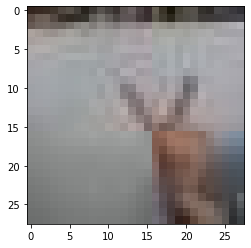

In [9]:
plt.imshow(x_train_norm[0])
print('라벨: ', y_train[0])

## 인공지능 모델 만들기

In [22]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=32
n_channel_2=64
#n_channel_3=64
# n_dense_1=64
n_dense=64
n_train_epoch=20

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3))) 
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
# 성능 향성을 위행 층 증가했지만 성능이 올라가지는 않음
# model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
# model.add(keras.layers.MaxPooling2D((2,2))) 
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(n_dense_1, activation='relu')) 
# model.add(keras.layers.Dropout(0.3)) 과적합을 막기위해서 사용
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
# model.add(keras.layers.Dropout(0.3))
# 여기서 10이 아닌 3이 들어가야 한다고 생각하는데 10이 결과가 잘나와서 일단은 10으로 작성하였다.
model.add(keras.layers.Dense(10, activation='softmax')) 

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                102464    
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

## 학습하고 결과 확인하기

In [23]:
# compile() 모델을 기계가 이해할 수 있도록 컴파일 합니다. 손실 함수와 옵티마이저, 메트릭 함수를 선택합니다.
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
# 모델 학습
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

print('테스트 결과')
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Epoch 1/20
104/104 [==============================] - 1s 3ms/step - loss: 1.1491 - accuracy: 0.4095
Epoch 2/20
104/104 [==============================] - 0s 3ms/step - loss: 0.8601 - accuracy: 0.6111
Epoch 3/20
104/104 [==============================] - 0s 3ms/step - loss: 0.6315 - accuracy: 0.7600
Epoch 4/20
104/104 [==============================] - 0s 3ms/step - loss: 0.4817 - accuracy: 0.8256
Epoch 5/20
104/104 [==============================] - 0s 3ms/step - loss: 0.3725 - accuracy: 0.8761
Epoch 6/20
104/104 [==============================] - 0s 3ms/step - loss: 0.3096 - accuracy: 0.8957
Epoch 7/20
104/104 [==============================] - 0s 3ms/step - loss: 0.2365 - accuracy: 0.9248
Epoch 8/20
104/104 [==============================] - 0s 3ms/step - loss: 0.1868 - accuracy: 0.9468
Epoch 9/20
104/104 [==============================] - 0s 3ms/step - loss: 0.1430 - accuracy: 0.9607
Epoch 10/20
104/104 [==============================] - 0s 3ms/step - loss: 0.1144 - accuracy: 0.9725

## 훈련 accuracy, loss 그래프로 그려보기

In [ ]:
# x축을 epoch, y축을 accuracy 또는 loss 로 나타내는 코드
# 다른 파일에서 훈련하고 테스트할 때 사용하여 추가로 작성
plt.plot(results.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

plt.plot(results.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 회고

### 사용한 데이터
훈련 데이터 1103 * 3개  
테스트 데이터 100 * 3개
### 기록
- 처음 정규화를 하지 않고 돌렸을때 test_accuracy가 0.03 test_loss가 10이상이 나왔다가 정규화를 하고 난 후에는 test_accuracy가 30퍼에 lose가 2점때가 나왔다. 

- 3번째 시도 : 층을 증가 시켜 보았다. 
        - 추가 했던 코드
            - 결과 : test_accuracy: 0.47333332896232605, test_loss: 1.7697465419769287 
            - 층을 늘리고 대략 17퍼 이상 올라가고 loss도 줄어들었다.
```python
n_channel_3=64
model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
```
- 4번째 시도 : epoch을 20으로 증가 시켜 보았다.
        - 결과 test_accuracy : 0.5133333206176758, test_loss: 2.3954508304595947 
        - accuracy가 0.04 증가하고 loss도 0.06증가 하였다.
        
- 5번째 시도 : n_dense의 수를 32 -> 64로 증가 시켜 보았다.
        - 결과 test_accuracy: 0.550000011920929, test_loss: 1.751854419708252 
        - accuracy가 0.04 증가했고 이번에는 loss가 1.7로 다시 줄어들었다.

- 6번째 시도 : epoch을 30을 증가 시켜 보았다.
        - 결과: test_accuracy: 0.5133333206176758, test_loss: 2.1954345703125 
        - epoch은 적당량 이상 돌리면 오히려 점수가 낮아지는 것을 확인 했다.
        
- n_dense, epoch, 늘린 층을 삭제등 여러번 돌렸을때 test_accuracy: 47 ~ 55, 나오고 loss 같은 경우 1.7 ~ 2.4사이가 나왔다.


- 늘린 층을 삭제후 n_channel_1,n_channel_2 숫자를 각가 32, 64로 변경하였고 n_dense을 64, epoch 20으로 돌렸다
    - test_accuracy: 0.6366666555404663, test_loss: 1.0639227628707886는 결과가 나왔다. 
    
    
    
- ```model.add(keras.layers.Dense(10, activation='softmax'))``` 이 부분을  3 -> 10으로 변경후 
    - test_accuracy: 0.6566666960716248, test_loss: 1.1727834939956665 결과 출력
    
    
- ```keras.layers.Dropout(0.25)```을 추가 하고 epoch 수를 늘렸지만 점수가 50~ 60점 사이의 점수가 나오고 loss 같은 <br>경우 1.2 ~ 2.2사이의 점수가 출력 되었다. 


- 이미지 사이즈를 (64,64) 변경했지만 정확도가 올라가지 안음 


- 이후 많은 시도를 하였지만 결과가 좋지 못 했다.

## 프로젝트를 통해 느낀점

이 프로젝트를 하면서 알고 있는 방법을 총 동원해 다양한 시도를 해보 았지만 최대 65퍼 이상을 올리지 못했고 같은 방법으로 돌려도 정확도와 loss가 차이가 발생했습니다. 그 이유를 생각해 보았을때 사진 데이터가 모두 다른 구조로 촬영된것과 배경이 있고 데이터의 양이 적은 것과 모델의 커스텀을 제대로 하지 못 하고 데이터 전처리 부분에서도 미숙하여 이러한 이유로 좋은 모델을 만들지 못한 것으로 판단됩니다. 이 프로젝트를 통해서 과적합을 막을 방법과 층을 늘리거나 복잡하게 만드는 방법등을 많이 시도해 보았고 그래서 이러한 부분을 많이 공부할 수 있었습니다. 이번 프로젝트에서 가장 부족한 했던 부분은 데이터 전처리라 생각되어 다음 프로젝트 부터는 데이터 전처리에 더 많은 시간을 투자하여 성능을 올려야 할것 같습니다. 또한 모델 설계 마지막 Dense에 10이 아닌 3이 들어가야 한다고 생각하지만 3보다 10 평균적으로 점수가 잘나와서 10을 사용하게 되었지만 이것에 대해서는 다음 프로젝트에서 더욱 신경써서 만들어 보아햐 할것 같습니다. 마지막으로 상황에 따라 층을 늘리거나 복잡하게 만드는 것이 꼭 좋은 모델을 만들 수 있는 것은 아닐수도 있다고 생각하게 되었습니다.. 